# k-NN

Here's some code to generate a mixture of gaussians. Each point is associated with one 2D gaussian distribution with fixed center and dispersion matrix. The label of the point corresponds to the center of its distribution. A plot is made showing the 3 categories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as sms

# Set the parameters for each Gaussian
means = [
    [2, 2],   # Mean of the first Gaussian
    [-1, -1], # Mean of the second Gaussian
    [3, -3]   # Mean of the third Gaussian
]
covariances = [
    [[1, 0.5], [0.5, 1]],  # Covariance of the first Gaussian
    [[1, -0.3], [-0.3, 1]], # Covariance of the second Gaussian
    [[1, 0.2], [0.2, 1]]   # Covariance of the third Gaussian
]
n_samples = 300  # Samples per Gaussian

# Generate data
data = []
labels = []
for i, (mean, cov) in enumerate(zip(means, covariances)):
    points = np.random.multivariate_normal(mean, cov, n_samples)
    data.append(points)
    labels += [i] * n_samples  # Label each Gaussian with a different number

# Combine all the data
data = np.vstack(data)
labels = np.array(labels)


# Make a Train Test Split

In [2]:
# your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

## Plot the train data

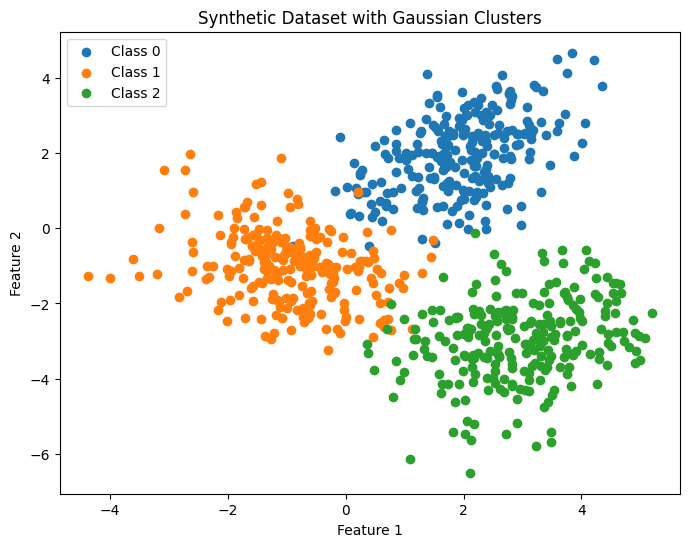

In [3]:

# Visualize the data
plt.figure(figsize=(8, 6))
for i in range(len(means)):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=f'Class {i}')
#for i in range(len(means)):
#    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'Class ?')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset with Gaussian Clusters')
plt.show()

## Implement k-NN with k=1

Write a knn_label method. Input

* X_train
* y_train
* X
* y

It finds and returns the label yhat by finding the 1 nearest neighbor to X in X_train and assigning the label of X_train[best] to yhat.

In [4]:
def single_k_label(X_train, y_train, X, y):
    min_dist = np.inf
    
    for i in range(len(X_train)):
        dist = np.sum((X_train[i] - X) ** 2)
        if dist < min_dist:
            min_dist = dist
            y = y_train[i]
    return y

Print out rows for each test data point in the format

`T/F, X1, X2, y, yhat`

where T/F is true if y==yhat

In [5]:
# your code
results = []
print("res\tx1\tx2\ty\tyhat")
for x,y in zip(X_train, y_train):
    yhat = single_k_label(X_train, y_train, x, -1)
    res = "T" if (y == yhat) else "F"
    x1 = round(x[0], 2)
    x2 = round(x[1], 2)
    print(f"{res}\t{x1}\t{x2}\t{y}\t{yhat}")

res	x1	x2	y	yhat
T	2.78	3.63	0	0
T	-0.04	-2.0	1	1
T	2.19	2.02	0	0
T	4.9	-2.78	2	2
T	-0.72	-2.13	1	1
T	-0.36	-1.13	1	1
T	1.26	2.53	0	0
T	2.82	2.62	0	0
T	-2.65	1.98	1	1
T	3.18	2.6	0	0
T	1.98	2.87	0	0
T	-1.11	-2.09	1	1
T	-0.72	-2.37	1	1
T	3.49	-2.61	2	2
T	-0.61	-2.29	1	1
T	1.71	1.21	0	0
T	2.45	-2.16	2	2
T	-0.63	-1.98	1	1
T	2.16	-3.37	2	2
T	-1.02	-0.26	1	1
T	2.62	-4.28	2	2
T	-3.21	-1.23	1	1
T	1.35	-3.01	2	2
T	1.86	1.15	0	0
T	1.83	-5.4	2	2
T	-1.88	-0.74	1	1
T	-1.82	-1.05	1	1
T	3.29	-2.91	2	2
T	3.72	-1.71	2	2
T	0.86	-3.54	2	2
T	-1.26	-1.89	1	1
T	0.36	-0.1	1	1
T	-0.93	-1.93	1	1
T	1.47	-2.17	2	2
T	0.24	-0.86	1	1
T	0.72	-2.42	1	1
T	-3.09	1.53	1	1
T	2.18	0.76	0	0
T	2.43	2.75	0	0
T	-1.18	-2.3	1	1
T	1.67	1.7	0	0
T	-1.23	-1.74	1	1
T	-1.59	-0.48	1	1
T	2.18	1.64	0	0
T	2.25	2.46	0	0
T	2.13	-5.64	2	2
T	-0.5	-0.3	1	1
T	4.5	-3.14	2	2
T	-0.17	-1.03	1	1
T	-0.44	-0.23	1	1
T	0.78	-2.7	1	1
T	3.29	-2.04	2	2
T	-1.43	-0.74	1	1
T	2.26	1.25	0	0
T	3.08	3.22	0	0
T	-1.52	1.18	1	1
T	-0.93	-0.63	1	1
T	2.36	2.48	0	0
T	2

Come up with a nice way to visualize the location of the test points. Mislabeled points should be clearly visible by some graphic attribute.

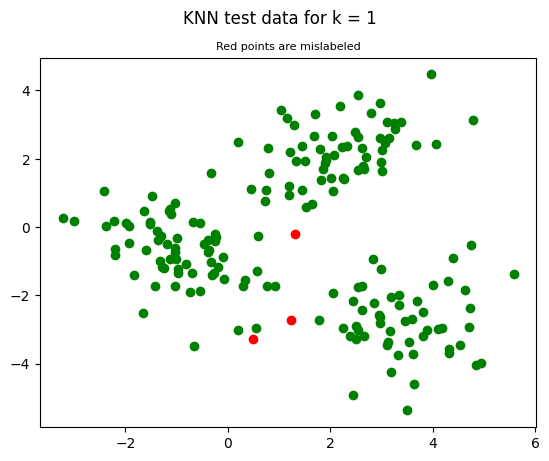

In [6]:
# Visualize the data
plt.suptitle("KNN test data for k = 1")
plt.title("Red points are mislabeled", fontsize=8)

for x, y in zip(X_test, y_test):
    yhat = single_k_label(X_train, y_train, x, -1)
    plt.scatter(x[0], x[1], color='green' if y == yhat else 'red')

## Extension

Expand this technique. You could 

* compute k-nn with k>1 and analyze the error rate as a function of k
* create d-dimensional datasets and analyze the error rate as a function of d (in this case your number of point should also scale appropriately to acheive a similar density)
* Vary the centers or dispersions of the distributions and analyze the error
* Vary the number of distributions AND also k. Is there a relation?
* Devise an algorithm for quickly solving k-nearest neighbors. Or quicker than what you probably did above. This is not an easy problem (implementing is optional)

## Trying to do multiple k

In [7]:
from scipy import stats

In [8]:
"""gets the index of the last elemtn in arr that is less than target"""
def lower_bound(arr, target):
    low = 0
    high = len(arr)
    while low < high:
        mid = (low + high) // 2
        if arr[mid] < target:
            low = mid + 1
        else:
            high = mid
    return low

In [9]:
# stuff here! and below
    
def knn_classify(k, X_train, y_train, x, y):
    closest = np.array([[np.inf, np.inf]])
    #closest[i] = [point index, distance]
    
    for i, p in enumerate(X_train):
        dist = np.sum((p - x) ** 2)
        index_to_put = lower_bound(closest[:,1], dist)
        if(index_to_put < k):
            closest = np.insert(closest, index_to_put, [i, dist], axis=0)
            if(len(closest) > k):
                closest = np.delete(closest, k, axis=0)
    if(closest[-1][1] == np.inf):
        closest = closest[:-1]
    ys = np.array([y_train[int(i)] for i in closest[:,0]])
    y = stats.mode(ys)
    return y.mode

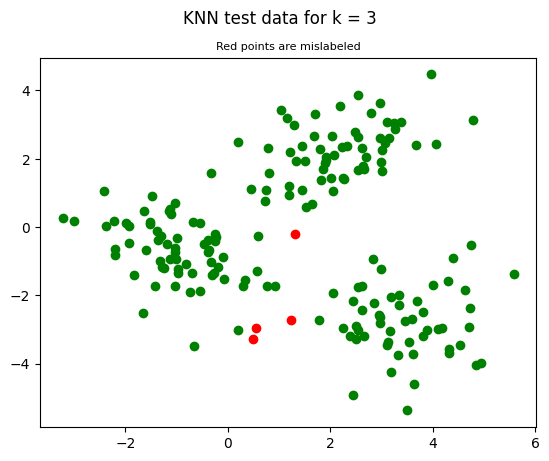

In [10]:
plt.suptitle("KNN test data for k = 3")
plt.title("Red points are mislabeled", fontsize=8)

for x, y in zip(X_test, y_test):
    yhat = knn_classify(3, X_train, y_train, x, -1)
    plt.scatter(x[0], x[1], color='green' if y == yhat else 'red')

In [12]:
from sklearn.metrics import accuracy_score


k_values = np.logspace(0, np.log(len(X_train)), 20, base=np.e).astype(int)
k_values = np.unique(k_values)
accuracy = np.array([])

for k in k_values:
    yhat = np.array([])
    for x, y in zip(X_test, y_test):
        yhat = np.append(yhat, knn_classify(k, X_train, y_train, x, -1))
    accuracy = np.append(accuracy, accuracy_score(y_test, yhat))
    print(f"k = {k}, accuracy = {accuracy[-1]}")
print(accuracy)

k = 1, accuracy = 0.9833333333333333
k = 2, accuracy = 0.9833333333333333
k = 3, accuracy = 0.9777777777777777
k = 5, accuracy = 0.9777777777777777
k = 7, accuracy = 0.9777777777777777
k = 11, accuracy = 0.9777777777777777
k = 15, accuracy = 0.9777777777777777
k = 22, accuracy = 0.9777777777777777
k = 31, accuracy = 0.9777777777777777
k = 45, accuracy = 0.9722222222222222
k = 63, accuracy = 0.9777777777777777
k = 90, accuracy = 0.9722222222222222
k = 127, accuracy = 0.9722222222222222
k = 180, accuracy = 0.9777777777777777
k = 254, accuracy = 0.9777777777777777
k = 360, accuracy = 0.9777777777777777
k = 509, accuracy = 0.9777777777777777
k = 719, accuracy = 0.29444444444444445
[0.98333333 0.98333333 0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97222222 0.97777778 0.97222222
 0.97222222 0.97777778 0.97777778 0.97777778 0.97777778 0.29444444]


I'm removing the last point because of the significant accuracy drop.

In [13]:
k_values = k_values[:-1]
accuracy = accuracy[:-1]

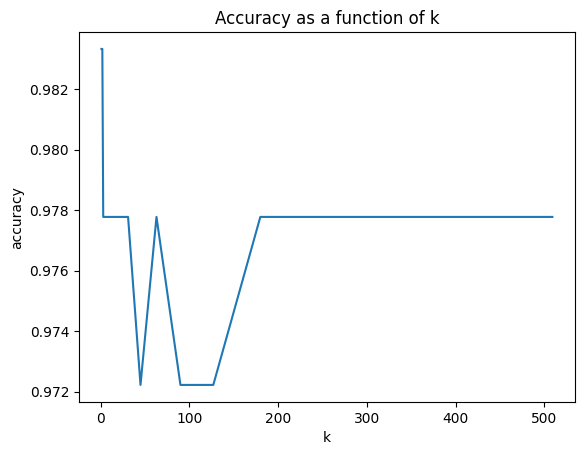

In [14]:
plt.title("Accuracy as a function of k")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(k_values, accuracy)
plt.show()

The best k value looks like it's at k=1. However, the accuracy only changes slightly, with only 1-6 points being mislabeled. This made the jumps in accuracy between the points, rather than some sort of continuum. Increasing the number of data points would make it more obvious the optimal k value to use.

### Error rate as number of dimensions increase

In [55]:
def generate_data_dimensions(dim):
    means = [
        np.random.randn(dim) * 3,
        np.random.randn(dim) * 3,
        np.random.randn(dim) * 3
    ]
    covariances = [
    ]
    for _ in range(3):
        mat = np.random.rand(dim, dim)
        mat = mat @ mat.T
        covariances.append(mat * 0.5 + 0.1 * np.eye(dim))
    n_samples = 300  # Samples per Gaussian

    # Generate data
    data = []
    labels = []
    for i, (mean, cov) in enumerate(zip(means, covariances)):
        points = np.random.multivariate_normal(mean, cov, n_samples)
        data.append(points)
        labels += [i] * n_samples  # Label each Gaussian with a different number

    # Combine all the data
    data = np.vstack(data)
    labels = np.array(labels)
    return data, labels

I'm using a very high k value in order to get the accuracy to change between the dimensions. If the k value is low, it seems like it's very easy for the closest neighbor in high dimensional space to be accurate.

In [58]:
from sklearn.neighbors import KNeighborsClassifier


d_values = [2, 3, 4, 5, 8, 10, 20, 50, 100, 200, 500]
accuracy = []
for d in d_values:
    total_acc = 0
    for _ in range(5):
        data2, label2 = generate_data_dimensions(d)
        X_train, X_test, y_train, y_test = train_test_split(data2, label2, test_size=0.2, random_state=42)
        model = KNeighborsClassifier(n_neighbors=500)
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        total_acc += accuracy_score(y_test, yhat)
    accuracy = np.append(accuracy, total_acc / 5)
    print(f"d = {d}, accuracy = {accuracy[-1]}")   

d = 2, accuracy = 0.6833333333333333
d = 3, accuracy = 0.8722222222222223
d = 4, accuracy = 0.6722222222222222
d = 5, accuracy = 0.79
d = 8, accuracy = 0.8422222222222222
d = 10, accuracy = 0.921111111111111
d = 20, accuracy = 0.9522222222222222
d = 50, accuracy = 0.9911111111111112
d = 100, accuracy = 0.96
d = 200, accuracy = 0.9244444444444444
d = 500, accuracy = 0.6955555555555556


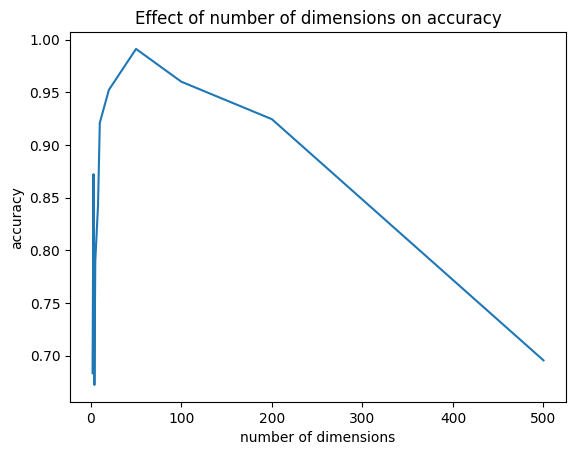

In [59]:
plt.title("Effect of number of dimensions on accuracy")
plt.xlabel("number of dimensions")
plt.ylabel("accuracy")
plt.plot(d_values, accuracy)
plt.show()

It looks like up until 50-100 dimensions, increasing the number of dimensions leads to an overall increase in the accuracy. This is probably because there are more smaller clumps compared to the large ones that existed in 2d. I saw this when I was plotting the data2 arrays, but I forgot to keep the plot. The accuracy drops off after 200 dimensions, probably due to noise or the density of the points being too low.

### Experimenting with the number of distributions

In [85]:
def generate_data_counts():
    means = [
        [4.5, 1.2],
        [-3.3, 2.7],
        [1.0, -4.5],
        [6.2, -2.3],
        [-5.1, -3.4],
        [2.0, 4.8],
        [-1.5, -6.1],
        [7.3, 4.5],
        [-0.5, 0.5],
        [3.5, -5.5],
        [-7.0, -2.0],
        [-7.5, -7.5]
    ]
    covariances = [
        [[0.8, 0.3], [0.3, 0.6]],
        [[0.7, -0.2], [-0.2, 0.5]],
        [[1.0, 0.1], [0.1, 0.9]],
        [[0.6, -0.1], [-0.1, 0.8]],
        [[0.9, 0.2], [0.2, 0.7]],
        [[0.7, -0.3], [-0.3, 0.6]],
        [[1.1, 0.1], [0.1, 0.8]],
        [[0.5, -0.1], [-0.1, 0.4]],
        [[0.6, 0.2], [0.2, 0.5]],
        [[0.9, -0.2], [-0.2, 0.6]],
        [[0.7, -0.1], [-0.1, 0.5]],
        [[0.8, 0.2], [0.2, 0.6]]
    ]
    
    n_samples = 300

    # Generate data
    data = []
    labels = []
    for i, (mean, cov) in enumerate(zip(means, covariances)):
        points = np.random.multivariate_normal(mean, cov, n_samples)
        data.append(points)
        labels += [i] * n_samples  # Label each Gaussian with a different number

    # Combine all the data
    data = np.vstack(data)
    labels = np.array(labels)
    return data, labels

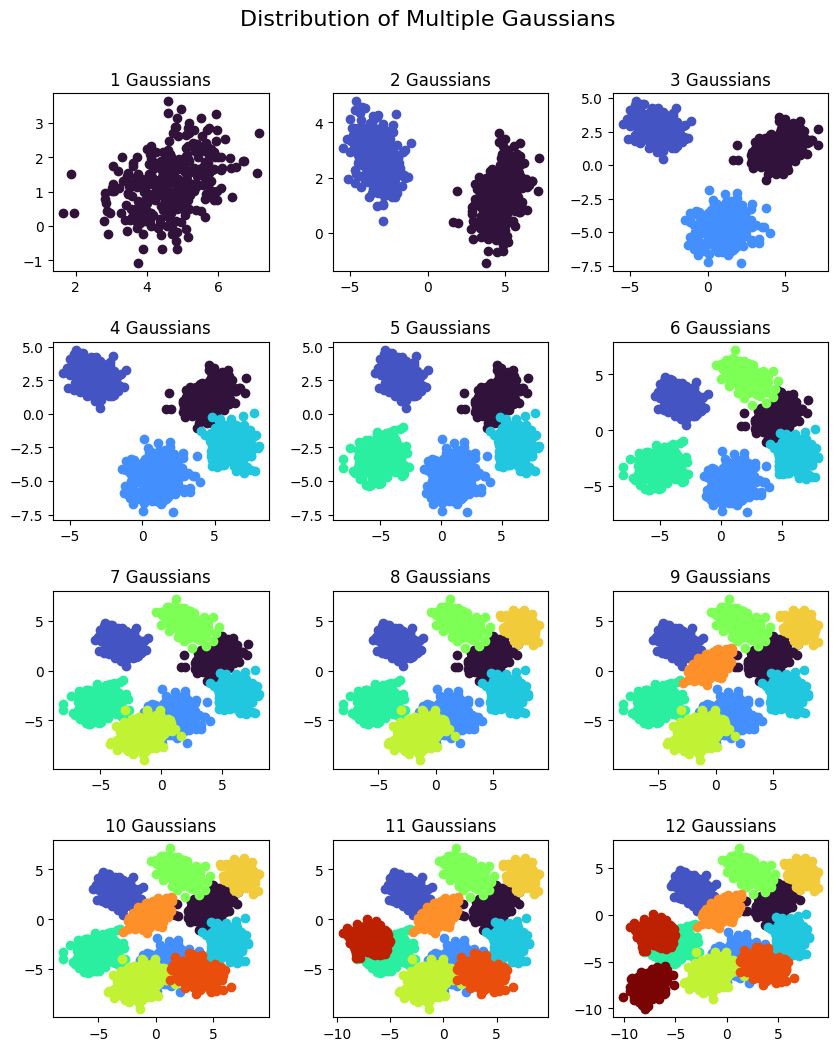

In [116]:
fig, axes = plt.subplots(4, 3, figsize=(10,12))
axes = axes.flatten()
data2, label2 = generate_data_counts()
colormap = plt.get_cmap('turbo', 12)
fig.suptitle("Distribution of Multiple Gaussians", x=0.5, y=0.95, fontsize=16)

for i in range(12):
    ax = axes[i]
    ax.set_title(f"{i + 1} Gaussians")
    for j in range(i + 1):
        color = colormap(j)
        ax.scatter(data2[label2 == j, 0], data2[label2 == j, 1], label=f'Class {j}', color=color)
    
plt.subplots_adjust(wspace=0.3, hspace=0.4)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data2, label2, test_size=0.2, random_state=42)
xtr = X_train[y_train == 0]
xte = X_test[y_test == 0]
ytr = y_train[y_train == 0]
yte = y_test[y_test == 0]
accuracy = []
accuracy2 = []
for i in range(12):
    if i != 0:
        xtr = np.concatenate((xtr, X_train[y_train == i]), axis=0) 
        xte = np.concatenate((xte, X_test[y_test == i]), axis=0) 
        ytr = np.concatenate((ytr, y_train[y_train == i]), axis=0)
        yte = np.concatenate((yte, y_test[y_test == i]), axis=0)
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(xtr, ytr)
    yhat = model.predict(xte)
    accuracy.append(accuracy_score(yte, yhat))
    model = KNeighborsClassifier(n_neighbors=20)
    model.fit(xtr, ytr)
    yhat = model.predict(xte)
    accuracy2.append(accuracy_score(yte, yhat))
    print(f"n = {i}, accuracy = {accuracy[-1]}, accuracy2 = {accuracy2[-1]}")

n = 0, accuracy = 1.0, accuracy2 = 1.0
n = 1, accuracy = 1.0, accuracy2 = 1.0
n = 2, accuracy = 1.0, accuracy2 = 1.0
n = 3, accuracy = 0.9962406015037594, accuracy2 = 0.9962406015037594
n = 4, accuracy = 0.9968454258675079, accuracy2 = 0.9968454258675079
n = 5, accuracy = 0.9974025974025974, accuracy2 = 0.9974025974025974
n = 6, accuracy = 0.9608294930875576, accuracy2 = 0.9815668202764977
n = 7, accuracy = 0.9637096774193549, accuracy2 = 0.9818548387096774
n = 8, accuracy = 0.9654545454545455, accuracy2 = 0.9836363636363636
n = 9, accuracy = 0.9445350734094616, accuracy2 = 0.964110929853181
n = 10, accuracy = 0.9365558912386707, accuracy2 = 0.959214501510574
n = 11, accuracy = 0.9402777777777778, accuracy2 = 0.9625


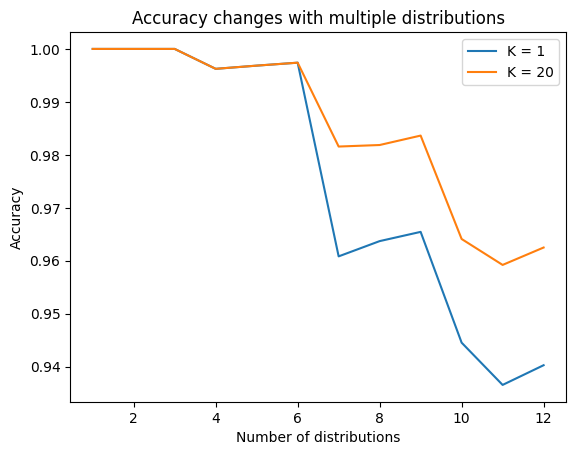

In [112]:
plt.title("Accuracy changes with multiple distributions")
plt.plot(range(1, 13), accuracy, label="K = 1")
plt.plot(range(1, 13), accuracy2, label="K = 20")
plt.legend()
plt.xlabel("Number of distributions")
plt.ylabel("Accuracy")
plt.show()

As the number of distributions increases, the accuracy decreases. When there are more distributions, there is more overlap between the distributions, and the closest neighbor is less likely to be part of the right distribution. This is shown in how the K=20 case performs better than K=1 after the distributions start to touch.